# Exercício 5 - Clusterização

Aluna: Maria Eduarda Guedes Pinto Gianisella    


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

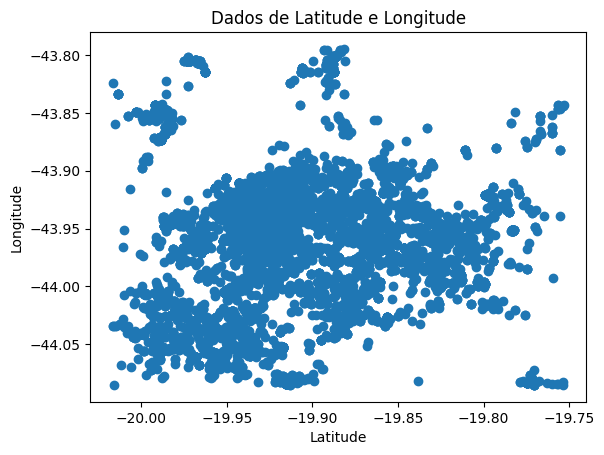

In [2]:
df = pd.read_csv('BHcheckins.txt', delimiter='\t', names=['Latitude', 'Longitude'])

plt.scatter(df['Latitude'], df['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Dados de Latitude e Longitude')
plt.show()


a)  Agrupando os estabelecimentos populares.


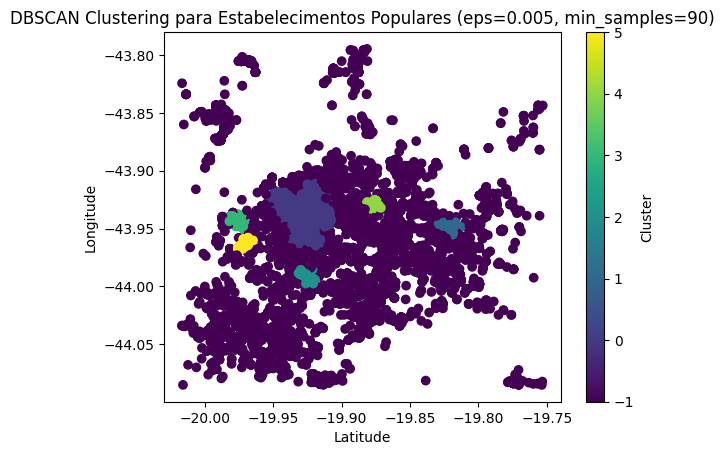

In [9]:
eps_popular = 0.005
percentage_min_samples_popular = 0.01

# Calculando o número mínimo de amostras com base na porcentagem
min_samples_popular = int(percentage_min_samples_popular * len(df))

dbscan_popular = DBSCAN(eps=eps_popular, min_samples=min_samples_popular)
labels_popular = dbscan_popular.fit_predict(df[['Latitude', 'Longitude']])

df['Cluster_Popular'] = labels_popular

plt.scatter(df['Latitude'], df['Longitude'], c=labels_popular, cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title(f'DBSCAN Clustering para Estabelecimentos Populares (eps={eps_popular}, min_samples={min_samples_popular})')
plt.colorbar(label='Cluster')
plt.show()


Ao escolher eps = 0.005 e min_samples = 0.01, prioriza-se a identificação de clusters de estabelecimentos populares que estejam geograficamente próximos e que contenham um número mínimo significativo de amostras para serem considerados como clusters válidos. Esses valores podem resultar em uma segmentação precisa e útil dos dados, especialmente para identificar padrões de densidade em áreas urbanas povoadas.

b) Agrupando os estabelecimentos não populares.

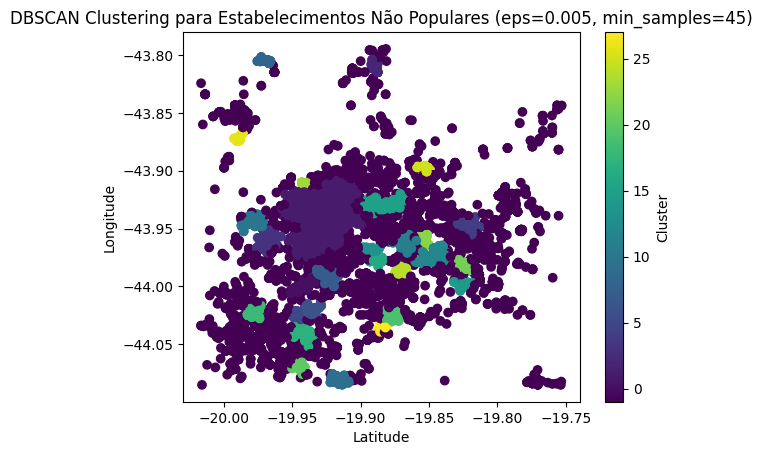

In [11]:
eps_nao_popular = 0.005
percentage_min_samples_nao_popular = 0.005

# Calculando o número mínimo de amostras com base na porcentagem
min_samples_nao_popular = int(percentage_min_samples_nao_popular * len(df))

dbscan_nao_popular = DBSCAN(eps=eps_nao_popular, min_samples=min_samples_nao_popular)
labels_nao_popular = dbscan_nao_popular.fit_predict(df[['Latitude', 'Longitude']])

df['Cluster_Nao_Popular'] = labels_nao_popular

plt.scatter(df['Latitude'], df['Longitude'], c=labels_nao_popular, cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title(f'DBSCAN Clustering para Estabelecimentos Não Populares (eps={eps_nao_popular}, min_samples={min_samples_nao_popular})')
plt.colorbar(label='Cluster')
plt.show()


Escolhi eps = 0.005 e min_samples = 0.005 para identificar agrupamentos de estabelecimentos não populares geograficamente próximos, com uma densidade mínima significativa. Esses valores ajudam a segmentar os dados de forma precisa, destacando áreas com menor densidade de estabelecimentos não populares em uma região urbana.

c) Visualização dos clusters.

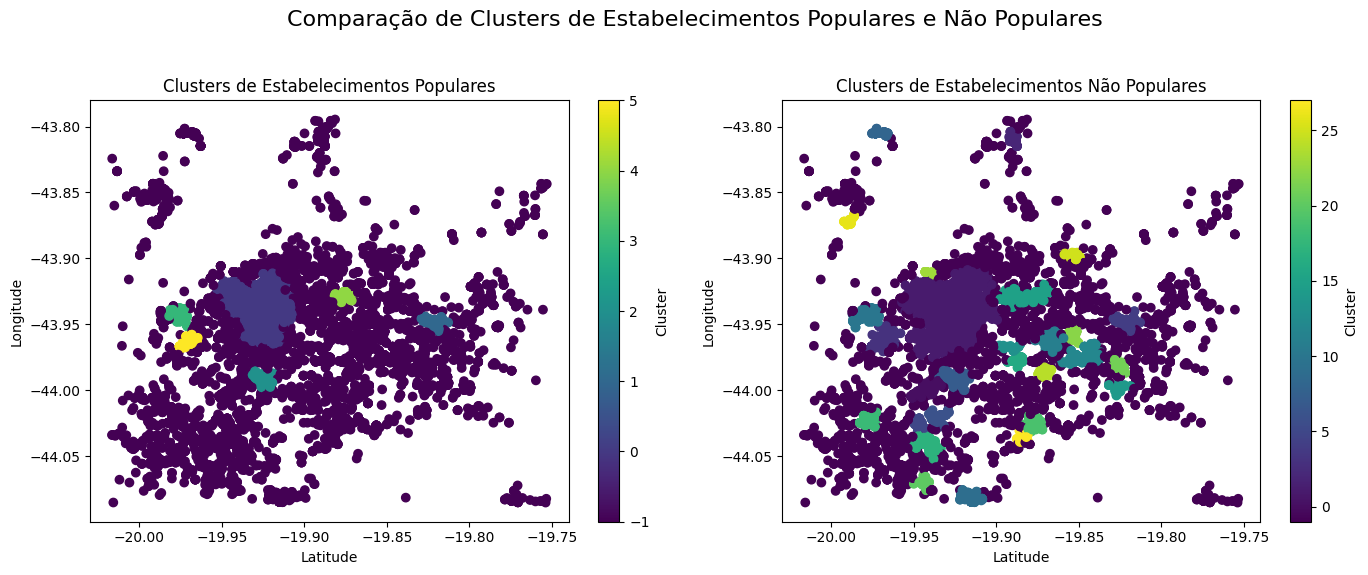

In [12]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Latitude'], df['Longitude'], c=labels_popular, cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters de Estabelecimentos Populares')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
plt.scatter(df['Latitude'], df['Longitude'], c=labels_nao_popular, cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters de Estabelecimentos Não Populares')
plt.colorbar(label='Cluster')

plt.suptitle('Comparação de Clusters de Estabelecimentos Populares e Não Populares', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Considerando os dados analisados, nota-se uma concentração de clusters de estabelecimentos populares nas áreas centrais da cidade, enquanto é perceptível que as regiões periféricas apresentam uma concentração de estabelecimentos não populares.